In [3]:
import numpy as np
from scipy.ndimage.filters import generic_filter as gf
from PIL import Image
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import scipy.stats.mstats as ms
import scipy.ndimage.morphology as morph
Image.MAX_IMAGE_PIXELS = None
import math
import sys
sys.path.append("..") 
from helper import index as helpers
from helper import fast as fastHelpers
from collections import deque
from sklearn.preprocessing import normalize

In [4]:
slope = np.load("../../Raw_Data_21_zones/Slope_14.npy")

In [5]:
ditches = np.load("../../Raw_Data_21_zones/Labels3m_14.npy")

In [6]:
impoundment = np.load("../../Raw_Data_21_zones/Impoundment_14.npy")

In [7]:
hpmf = np.load("../../Raw_Data_21_zones/HPMF_14.npy")

In [8]:
skyView = np.load("../../Raw_Data_21_zones/SkyViewFactor_14.npy")

In [9]:
DEM = np.load("../../Raw_Data_21_zones/DEM_14.npy")

In [12]:
hpmfFilter = fastHelpers.hpmfFilter(hpmf)

In [ ]:
test = skyViewHPMFGaborStreamRemoval(hpmfFilter.compute(scheduler='processes'), streamAmp)

In [15]:
def skyViewHPMFGaborStreamRemoval(feature, streamAmp):
    conicStreamRemoval = feature.copy()
    maxVal = np.amax(feature)
    for i in range(len(conicStreamRemoval)):
        for j in range(len(conicStreamRemoval[i])):
            if streamAmp[i][j] != 0:
                conicStreamRemoval[i][j] += streamAmp[i][j] * maxVal
                if conicStreamRemoval[i][j] > maxVal:
                    conicStreamRemoval[i][j] = maxVal
    return conicStreamRemoval

In [ ]:
plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(1,2,i+1) for i in range(2)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

ax[0].title.set_text("skyview")
ax[0].imshow(skyView)
ax[1].title.set_text("hpmf feature test")
ax[1].imshow(test)

In [10]:
streamAmp = helpers.streamAmplification(impoundment)

In [ ]:
plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(1,1,i+1) for i in range(1)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

ax[0].title.set_text("Stream amp")
ax[0].imshow(streamAmp)

In [11]:
np.amax(smoothedOut)

1.0

In [12]:
smoothedOut.shape

(2997, 2620)

In [13]:
impFilter = helpers.DEMDitchDetection(DEM)

In [14]:
hpmfFilter = impFilter

In [42]:
np.amax(impFilter)

1000.0

In [16]:
hpmfFilter.shape

(2997, 2620)

In [17]:
hpmfFilter

array([[  97.80405426,   97.12837982,   96.62162018, ...,  366.89190674,
         368.91891479,  368.91891479],
       [  98.14189148,   97.63513184,   96.9594574 , ...,  368.91891479,
         368.91891479,  368.91891479],
       [  98.64865112,   97.97297668,   97.29729462, ...,  362.83782959,
         360.81082153,  360.81082153],
       ..., 
       [ 235.13513184,  239.18919373,  250.67567444, ...,  571.45269775,
         602.70269775,  620.27026367],
       [ 229.72973633,  239.86486816,  256.08108521, ...,  570.10137939,
         605.40539551,  618.2432251 ],
       [ 231.75675964,  239.86486816,  253.37837219, ...,  568.07434082,
         603.37835693,  618.2432251 ]], dtype=float32)

In [18]:
def impoundmentStreamRemoval(impFeature, streamAmp):
    impStreamRemoval = impFeature.copy()
    for i in range(len(impStreamRemoval)):
        for j in range(len(impStreamRemoval[i])):
            if streamAmp[i][j] != 0:
                impStreamRemoval[i][j] *= (1 - streamAmp[i][j])
            if streamAmp[i][j] > 0.7:
                impStreamRemoval[i][j] *= 0.3
    return impStreamRemoval

In [43]:
def skyViewHPMFStreamRemoval(conicFeature, streamAmp):
    conicStreamRemoval = conicFeature.copy()
    maxVal = np.amax(conicFeature)
    for i in range(len(conicStreamRemoval)):
        for j in range(len(conicStreamRemoval[i])):
            if streamAmp[i][j] != 0:
                conicStreamRemoval[i][j] += streamAmp[i][j] * maxVal
                if conicStreamRemoval[i][j] > maxVal:
                    conicStreamRemoval[i][j] = maxVal
    return conicStreamRemoval

In [14]:
#conicStreamRemoval = helpers.skyViewStreamRemoval(conicFilter, smoothedOut)
#impStreamRemoval = impFilter.copy()
#for i in range(len(impStreamRemoval)):
#    for j in range(len(impStreamRemoval[i])):
#        if smoothedOut[i][j] != 0:
#            impStreamRemoval[i][j] *= (1 - smoothedOut[i][j] if smoothedOut[i][j] > 0.7 else 0.3)
            
impStreamRemoval = helpers.impoundmentStreamRemoval(impFilter, smoothedOut)

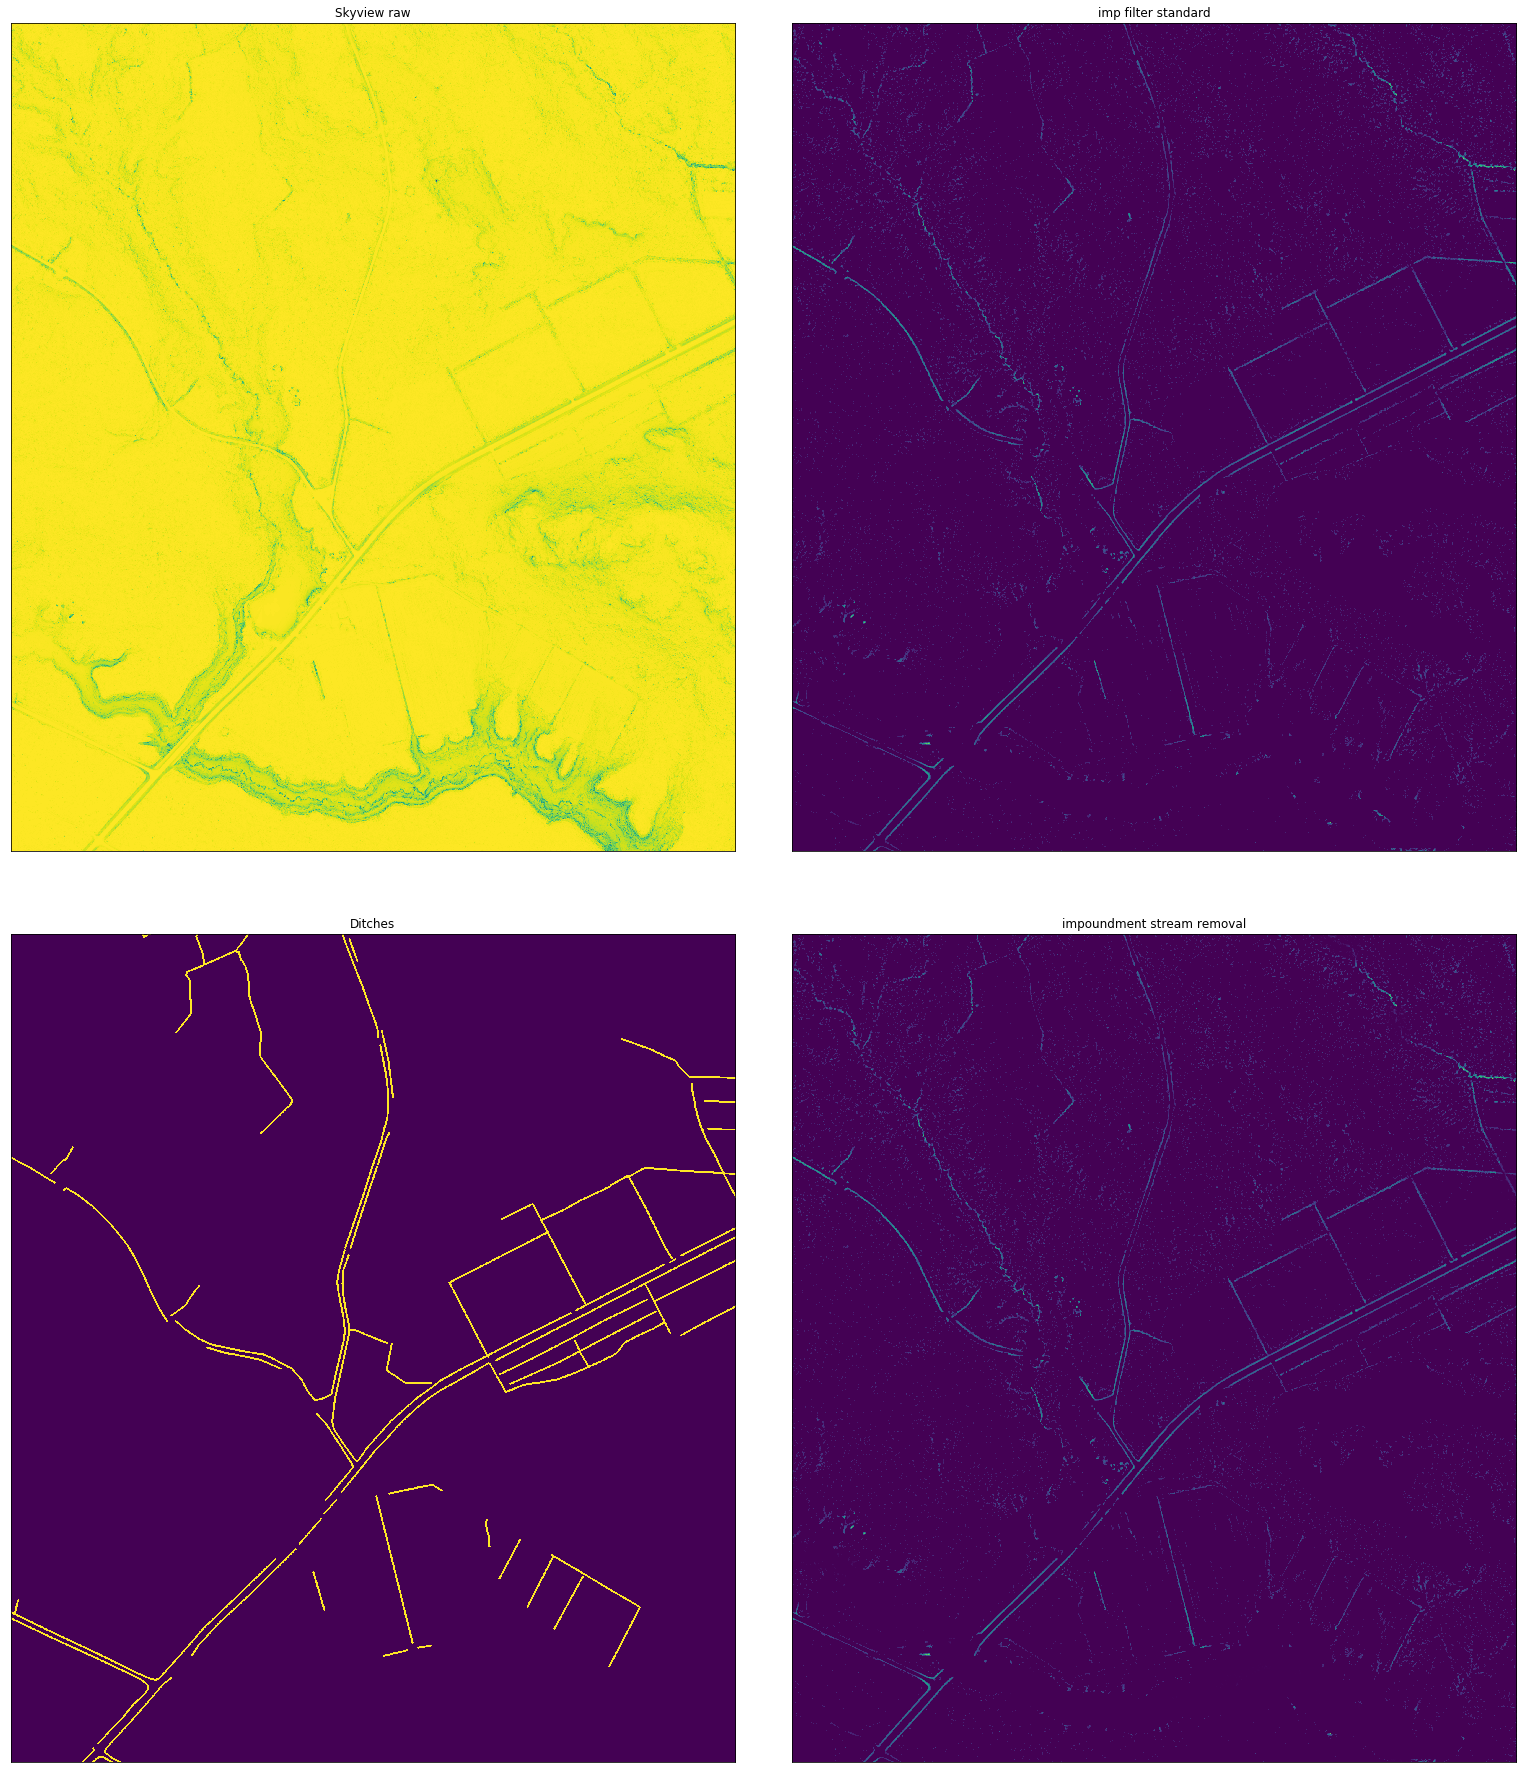

In [15]:
plt.figure(num=None, figsize=(28,32), facecolor='w', edgecolor='k')
ax = [plt.subplot(2,2,i+1) for i in range(4)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.tick_params(bottom=False, left=False)
plt.subplots_adjust(wspace=0,hspace=0.1)

ax[0].title.set_text("Skyview raw")
ax[0].imshow(skyView)
ax[1].title.set_text("imp filter standard")
ax[1].imshow(impFilter)
ax[2].title.set_text("Ditches")
ax[2].imshow(ditches)
ax[3].title.set_text("impoundment stream removal")
ax[3].imshow(impStreamRemoval)